In [1]:
import pandas
import numpy

In [2]:
dataset=pandas.read_csv("50_Startups.csv")

In [3]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [4]:
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
y=dataset["Profit"]

In [6]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [27]:
x=dataset[['R&D Spend', 'Administration', 'Marketing Spend']]

In [8]:
state=dataset["State"]

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
state_le=LabelEncoder()

In [11]:
state_final=state_le.fit_transform(state)

In [12]:
state_final

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0])

In [13]:
type(state_final)

numpy.ndarray

In [14]:
state_le_final=state_final.reshape(-1,1)

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
state_ohe=OneHotEncoder()

In [17]:
state_ohe_final=state_ohe.fit_transform(state_le_final)

In [18]:
state_ohe_final

<50x3 sparse matrix of type '<class 'numpy.float64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [19]:
state_ohe_trap=state_ohe_final[:,0:2]

In [20]:
state_ohe_trap

<50x2 sparse matrix of type '<class 'numpy.float64'>'
	with 33 stored elements in Compressed Sparse Row format>

In [21]:
state_ohe_trap=state_ohe_trap.toarray()

In [23]:
state_ohe_trap

array([[0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.]])

In [28]:
x=numpy.hstack((x,state_ohe_trap))

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [35]:
from sklearn.linear_model import LinearRegression

In [37]:
model=LinearRegression()

In [38]:
model.fit(X_train,y_train)

LinearRegression()

In [39]:
y_predict=model.predict(X_test)

In [40]:
y_predict

array([156148.29489082,  68969.65535843,  88379.86901725, 180156.25349689,
       147657.99805331, 100180.28666424,  86890.45005219,  73564.25083752,
       193804.44239339,  56149.76233358, 134156.99867378, 132305.22699165,
       114845.51478182, 104257.37017513, 187208.90935392])

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

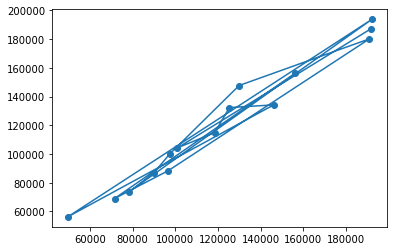

In [43]:
plt.scatter(y_test,y_predict)
plt.plot(y_test,y_predict)